# B: Studying Higgs Boson Analysis. Signal and Background

## Study of a Uniform -- not a Sloping Background

In [2]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Shell import Shell

In [3]:
StopWatch.start("total")
StopWatch.progress(0)
StopWatch.start("import")
import numpy as np    # noqa: E402
import matplotlib.pyplot as plt    # noqa: E402
import os
# import pylab
StopWatch.stop("import")

def save(file):
  name = os.path.basename(file).replace(".py", "")
  cwd = Shell.map_filename(".").path
  Shell.mkdir(f"{cwd}/images")
  plt.savefig(f'{cwd}/images/{name}.png',dpi=300)
  plt.savefig(f'{cwd}/images/{name}.pdf')
  plt.savefig(f'{cwd}/images/{name}.svg')
  plt.show()

# cloudmesh status=running progress=0 pid=17280


# cloudmesh status=running progress=30 pid=17280


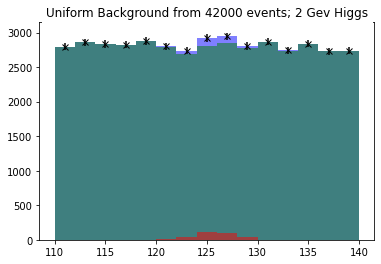

# cloudmesh status=running progress=60 pid=17280
# cloudmesh status=running progress=80 pid=17280


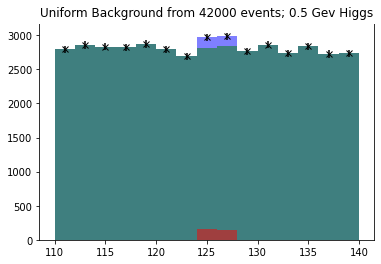

# cloudmesh status=running progress=85 pid=17280
# cloudmesh status=running progress=90 pid=17280


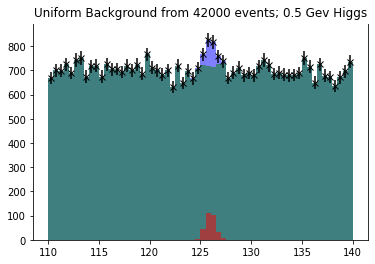


+------------------+----------------------------------------------------------------------------------+
| Attribute        | Value                                                                            |
|------------------+----------------------------------------------------------------------------------|
| cpu              |                                                                                  |
| cpu_cores        | 4                                                                                |
| cpu_count        | 8                                                                                |
| cpu_threads      | 8                                                                                |
| date             | 2022-07-15 17:09:23.657043                                                       |
| frequency        | scpufreq(current=1298.0, min=0.0, max=1498.0)                                    |
| mem.available    | 6.4 GiB                                   

In [4]:
n = 42000
StopWatch.start(f"create-randomdata-{n}")
Base = 110 + 30 * np.random.rand(n)
# Base is set of observations with an expected 2800 background events  per bin
# Note we assume here flat but in class I used a "sloping" curve that represented experiment better
gauss = 2 * np.random.randn(300) + 126
# Gauss is Number of Higgs particles
simpletotal = np.concatenate((Base, gauss))
# simpletotal is Higgs+Background
StopWatch.stop(f"create-randomdata-{n}")
StopWatch.progress(30)

StopWatch.start("plot-higgs-graphs")
plt.figure("Total Wide Higgs Bin 2 GeV")
values, binedges, junk = plt.hist(simpletotal, bins=15, range=(110,140), alpha=0.5, color="blue")
centers = 0.5 * (binedges[1:] + binedges[:-1])
# centers is center of each bin
# values is number of events in each bin
# :-1 is same as :Largest Index-1
# binedges[:-1] gets you lower limit of bin
# 1: gives you array starts at second index (labelled 1 as first index 0)
# binedges[1:] is upper limit of each bin
# Note binedges has Number of Bins + 1 entries; centers has Number of Bins entries
errors =np.sqrt(values)
# errors is expected error for each bin
plt.hist(Base, bins=15, range =(110,140), alpha = 0.5, color="green")
plt.hist(gauss, bins=15, range =(110,140), alpha = 0.5, color="red")
plt.errorbar(centers, values, yerr = errors, ls='None', marker ='x', color = 'black', markersize= 6.0 )
plt.title("Uniform Background from 42000 events; 2 Gev Higgs", backgroundcolor = "white")
# For Agg backend
save("wide-higgs-2gev")
StopWatch.progress(60)

NarrowGauss = 0.5 * np.random.randn(300) + 126
# NarrowGauss is Number of Higgs particles
simpletotal = np.concatenate((Base, NarrowGauss))
plt.figure("Total Narrow Higgs Bin 2 GeV")
values, binedges, junk = plt.hist(simpletotal, bins=15, range =(110,140), alpha = 0.5, color="blue")
centers = 0.5*(binedges[1:] + binedges[:-1])
errors =np.sqrt(values)
StopWatch.progress(80)

plt.hist(Base, bins=15, range=(110,140), alpha=0.5, color="green")
plt.hist(NarrowGauss, bins=15, range=(110, 140), alpha=0.5, color="red")
plt.errorbar(centers, values, yerr=errors, ls='None', marker ='x', color='black', markersize=6.0 )
plt.title("Uniform Background from 42000 events; 0.5 Gev Higgs", backgroundcolor="white")
save("narrow-gauss")
StopWatch.progress(85)

plt.figure("Total Narrow Higgs Bin 0.5 GeV")
values, binedges, junk = plt.hist(simpletotal, bins=60, range=(110, 140), alpha=0.5, color="blue")
centers = 0.5*(binedges[1:] + binedges[:-1])
errors =np.sqrt(values)
StopWatch.progress(90)

plt.hist(Base, bins=60, range=(110, 140), alpha=0.5, color="green")
plt.hist(NarrowGauss, bins=60, range=(110,140), alpha=0.5, color="red")
plt.errorbar(centers, values, yerr=errors, ls='None', marker ='x', color='black', markersize=6.0 )
plt.title("Uniform Background from 42000 events; 0.5 Gev Higgs", backgroundcolor="white")
save("total-narrow-higgs-0.5gev")
StopWatch.stop("plot-higgs-graphs")
StopWatch.stop("total")
StopWatch.benchmark()
StopWatch.progress(100)